In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv('/kaggle/input/old-car-price-data/imports-85.data.txt',names=headers)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.replace('?',np.nan,inplace=True )

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
avg_normalized_losses=df['normalized-losses'].astype('float').mean()
avg_stroke=df['stroke'].astype('float').mean()
avg_bore=df['bore'].astype('float').mean()
avg_horsepower=df['horsepower'].astype('float').mean()
avg_peak_rpm=df['peak-rpm'].astype('float').mean()

In [9]:
df['normalized-losses'].replace(np.nan,avg_normalized_losses,inplace=True)
df['stroke'].replace(np.nan,avg_stroke,inplace=True)
df['bore'].replace(np.nan,avg_bore,inplace=True)
df['peak-rpm'].replace(np.nan,avg_peak_rpm,inplace=True)
df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)

In [10]:
df.dropna(subset=['price'],inplace=True)

In [11]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("int")
df["price"] = df["price"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df['horsepower']=df['horsepower'].astype('float')

In [13]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [14]:
fuel_variable=pd.get_dummies(df['fuel-type'])

In [15]:
df=pd.concat([df,fuel_variable],axis=1)

In [16]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1


In [17]:
df=df.drop('fuel-type',axis=1)

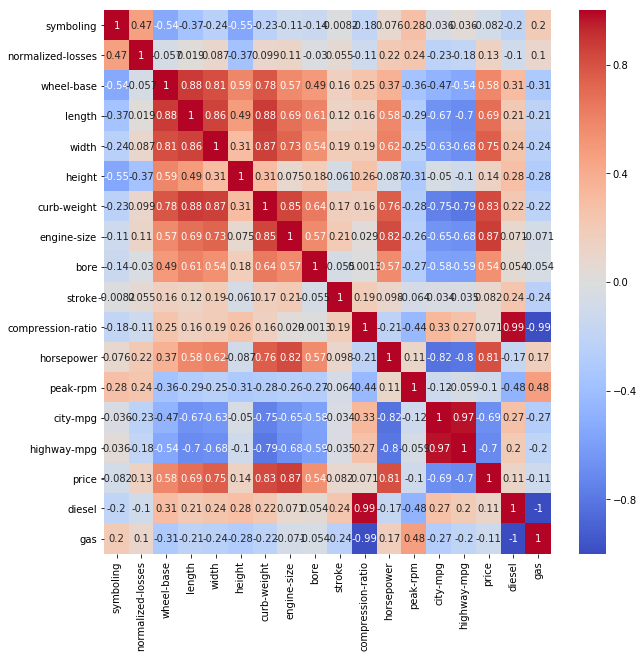

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)

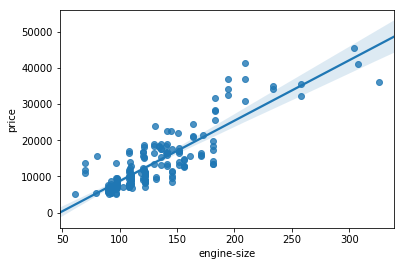

In [19]:
sns.regplot('engine-size','price',df)

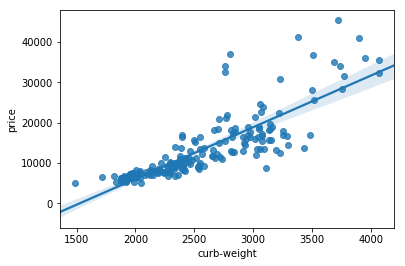

In [20]:
sns.regplot('curb-weight','price',df)

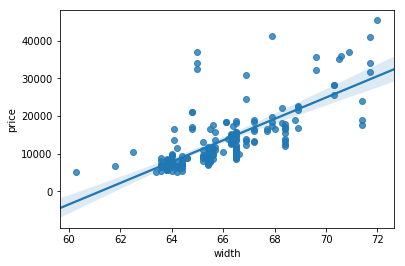

In [21]:
sns.regplot('width','price',df)

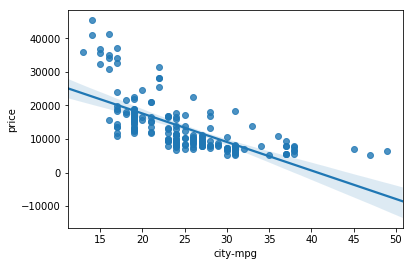

In [22]:
sns.regplot('city-mpg','price',df)

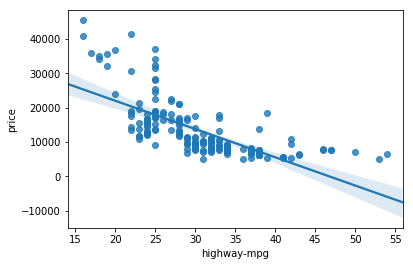

In [23]:
sns.regplot('highway-mpg','price',df)

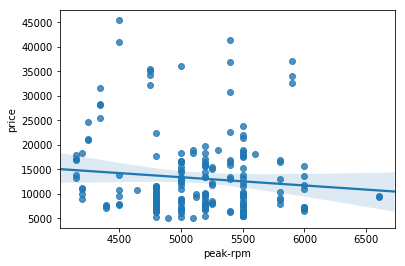

In [24]:
sns.regplot('peak-rpm','price',df)

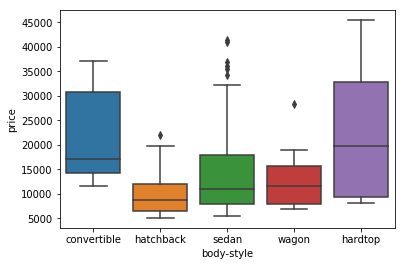

In [25]:
sns.boxplot(x='body-style',y='price',data=df)

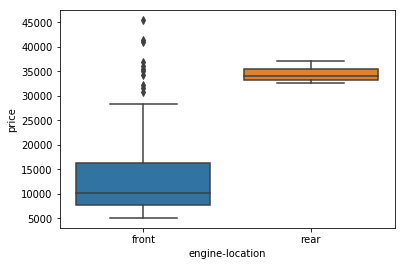

In [26]:
sns.boxplot(x='engine-location',y='price',data=df)

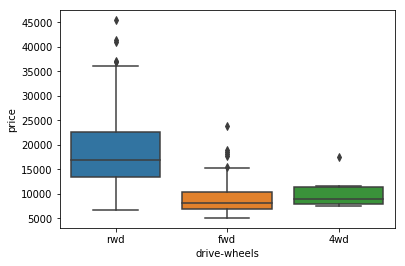

In [27]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [28]:
from scipy import stats

Let's check  Pearson Correlation Coefficient and P-value  for different variables to determine the important variables in predicting price

Wheel-base VS Price

In [29]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of  =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of  = 8.076488270732955e-20


In [30]:
#Horsepower VS Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of  = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of  =  6.36905742825998e-48


In [31]:
#Length VS Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of  = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of  =  8.016477466159053e-30


In [32]:
#Width VS Price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of  =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of  = 9.20033551048166e-38


In [33]:
#Curb-weight vs Price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of  =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of  = 9.20033551048166e-38


In [34]:
#Engine-Size VS Curb
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of = 9.265491622197996e-64


In [35]:
#Bore VS Price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17


In [36]:
#City-mpg VS Price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of  = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of  =  2.3211320655676368e-29


In [37]:
#Highway-mpg VS Price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of  = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of  =  1.7495471144476807e-31


The important variable that will determine the price of the car are: Length,
Width,
Curb-weight,
Engine-size,
Horsepower,
City-mpg,
Highway-mpg,
Wheel-base,
Bore 

In [38]:
x=df[['length','width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','wheel-base','bore']]

In [39]:
y=df['price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
pred=lr.predict(x_test)

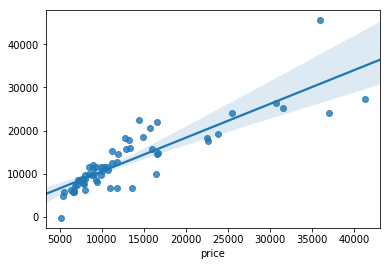

In [46]:
sns.regplot(y_test,pred)

We can that the model has predicted the values with a good fit 